# ECON 5181 Assignment 2

Due: April 5, 2024, noon. Submission on Blackboard.

DON'T forget your VeriGuide report and honesty declaration! 

*The copyright of this content, produced by staff members/ teachers of The Chinese University of Hong Kong (CUHK), belongs to CUHK.  Students shall not distribute, share, copy or upload the content to a third party.*

## Q1. Regression trees

We consider the following data generating process:

$$Y_i = X_{i1} + X_{i2}  + U_i$$

where $X_1, X_2$ are independent standard normal random variables, and $U$ is standard normal, independent of the $X$'s. 

In this exercise, we study the behavior of regression trees in this additive model. 

#### 1. Simulate $S = 500$ samples according to the DGP, each with a sample size $n = 1600$. In each simulated sample, randomly split the data into 1200 observations that will form a training set and 400 observations that will form the test set.

In [ ]:
## Set model primitives
# INPUT your code here

Nsim <- 500
N <- 1600
...

#### 2. Estimate a regression tree of $Y_i$ on $X_{i1}, X_{i2}$ in each simulated sample. 

You will use R pacakge to implement CART, which does pruning and cross validation

In [13]:
## List the packages we need, install if missing, then load all of them
# data.table is an enhanced version of data.frame
# ggplot makes beautiful plots and is flexible and powerful, especially with overlaying

PackageList =c('tree', 'rpart', 'randomForest', 'data.table', 'ggplot2')
NewPackages=PackageList[!(PackageList %in%
installed.packages()[,"Package"])]

if(length(NewPackages)) install.packages(NewPackages)

lapply(PackageList,require,character.only=TRUE)#array function

set.seed(156) #Always set the seed for reproducibility

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

In [4]:
## Write a function to estimate a regression tree
# INPUT your code here


# Here is an example that I wrote using rpart, which offers more controls than the tree package 
# we saw earlier in the lecture codes
estimate_tree <- function(formula, train_dt){
    big.tree <- rpart(formula = formula, data = train_dt, method = "anova", control = rpart.control(minsplit = 5,
                                                                                    cp = 1e-4,
                                                                                    xval = 10))
    bestcp <- big.tree$cptable[which.min(big.tree$cptable[, 'xerror']), "CP"]
    best.tree <- prune(big.tree, cp = bestcp)

    return(best.tree)
}

[1] "tree"

In [11]:
## Create an array to store the tree estimate for all simulations
# INPUT your code here

rmse <- rep(0, Nsim)
leaves <- rep(0, Nsim)
...

#### 3. Pick any simulated sample. Plot the training data points on a plane and use color to signify the values of $y$.  On the same plot, overlay with the prediction surface of your estimated tree.

In [21]:
# INPUT your code here

# scatterplot with ggplot2: color by y values
sp <-ggplot(train_dt, aes(x=x1, y=x2, color=y)) + geom_point()

# continuous color gradient
sp + scale_color_gradient2(midpoint=mid, low="blue", mid="white",
                     high="red", space ="Lab")

In regression problems, we aim to come up with a model that yields the best predictive performance (on new data). Empirically, an estimate of the expected error is the mean squared error (MSE), defined as the average squared distance between prediction $\hat{Y}_i$ and true value $Y_i$ for observations in the test set. In Machine learning papers, people typically report the square root of MSE to evaluate and compare the performances of different regression models. This metric is known as RMSE.

#### 4. Report the mean and standard deviation of *the number of leaves* and the root mean squared error (*RMSE*) across all simulations.

In [ ]:
# INPUT your code here

# compute RMSE on test data
rmse <- sqrt(mean((y - predict(best.tree, test_dt))^2))

# compute the number of leaves of a given tree
leaves_w[s] <- length(unique(best.tree$where))

#### 5. Repeat the previous steps, but now using a regression tree of $Y_i$ on $W_i = X_{i1} + X_{i2}$. Compare the number of leaves and RMSE obtained in this model with those in the previous model. Comment on the results.

In [15]:
# INPUT your code here

# add one column W to your data (both train and test)

# use the previously defined function to estimate trees

# output a table with two columms: number of leaves, RMSE and two rows: tree with X, tree with W

In [19]:
# INPUT your comment here




#### 6. Repeat the previous steps, now using a 1-hidden layer neural network with $K=2$ hidden units. Compare the results for trees and neural networks when trained on $X$ vs $W$. Discuss the similarities and differences between these two methods. 

You will use a R package to train a neural network. 

In [ ]:
# INPUT your code here



# Here is an example that I wrote to train a simple neural network.
# I use neuralnet, which is more sophisticated than the package nnet
# that we saw earlier in the lecture codes
nn_x <- neuralnet(y ~ x1 + x2, data = train_dt, hidden = 2, act.fct = "logistic", 
                  linear.output = TRUE, stepmax = 1e6) # regression, set linear.output to TRUE

# "logistic" is just our sigmoid function, you can verify by defining the sigmoid function explicitly
sigmoid = function(x) {
  1/(1 + exp(-x))
}

# output a table with two columms: number of leaves, RMSE and four rows: tree with X, tree with W, 
# nnet with X, nnet with W



In [20]:
# INPUT your comment here




## Q2. Logistic regression

In class, we mentioned that neural network without the hidden layer will degenerate to a logistic regression model. In this exercise, we explore this frequently used nonlinear model in predicting a binary response $Y_i \in \{0, 1\}$. 

The model has the form:
$$Pr(Y = 1|X=x;\beta) = \frac{\exp (x'\beta)}{1 + \exp(x'\beta)}$$

#### 1. Write down the log-likelihood function $l(b)$ for observing $\{x_i, y_i\}, i = 1, \cdots, n$ in the training sample

In [24]:
# INPUT your answer here



#### 2. We estimate the model by maximum likelihood. Is the log-likelihood function convex? Justify your answer.

In [25]:
# INPUT your answer here



#### 3. We use gradient descent to solve the optimization problem. Derive the gradient $\nabla l(b)$. Program a procedure for estimating a logistic regression model using gradient descent.

In [22]:
# INPUT your answer here



In [23]:
# INPUT your answer here by filling in the missing code below

# objective function
obj_function = function(X, y, b){
    
}
# gradient function
grad_function = function(X, y, b){
    
}
# function to do gradient descent
grad_descent <- function(l, grad_l, X, y, alpha, max_iter, tol){
    
}

# Run gradient descent to estimate the model parameters
logistic_gr <- grad_descent(l = obj_function, grad_l = grad_function, X, y, alpha, max_iter, tol)

Credit scoring is a classic problem in classification. When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Such decisions ideally should rely on an assessment of default risk.

We turn to the widely used German credit data to investigate binary classification using logistic regression model and others. Data and code are on Blackboard in `credit.zip`. 

The dataset consists of 1000 records of approved loan applications. The dependent variable for your purpose is `default`, which codes whether the credit contract has been complied with (0) or not (1). Other variables in the dataset are borrower and loan characteristics, including a person's prior credit history.

Data is downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). Some data cleaning needs to be done before we can comfortably work with it...

Dealing with missing values

In [1]:
## naref: make missing (NA) the reference level of a factor

xnaref <- function(x){
	if(is.factor(x))
		if(!is.na(levels(x)[1]))
			x <- factor(x,levels=c(NA,levels(x)),exclude=NULL)
	return(x) }

naref <- function(DF){
	if(is.null(dim(DF))) return(xnaref(DF))
	if(!is.data.frame(DF)) 
		stop("You need to give me a data.frame or a factor")
	DF <- lapply(DF, xnaref)
	return(as.data.frame(DF))
}

Read data and create some interesting variables. Helpful to look at the codebook and figure out the meaning of original labels

In [7]:
credit <- read.csv("./credit/credit.csv")

## re-level the credit history and checking account status
credit$history = factor(credit$history, levels=c("A30","A31","A32","A33","A34"))

levels(credit$history) = c("good","good","poor","poor","terrible")

## a few others
credit$foreign <- factor(credit$foreign, levels=c("A201","A202"), labels=c("foreign","german"))
credit$rent <- factor(credit$housing=="A151")
credit$purpose <- factor(credit$purpose, levels=c("A40","A41","A42","A43","A44","A45","A46","A47","A48","A49","A410"))
levels(credit$purpose) <- c("newcar","usedcar",rep("goods/repair",4),"edu",NA,"edu","biz","biz")

In [8]:
dim(credit)

[1] 1000   22

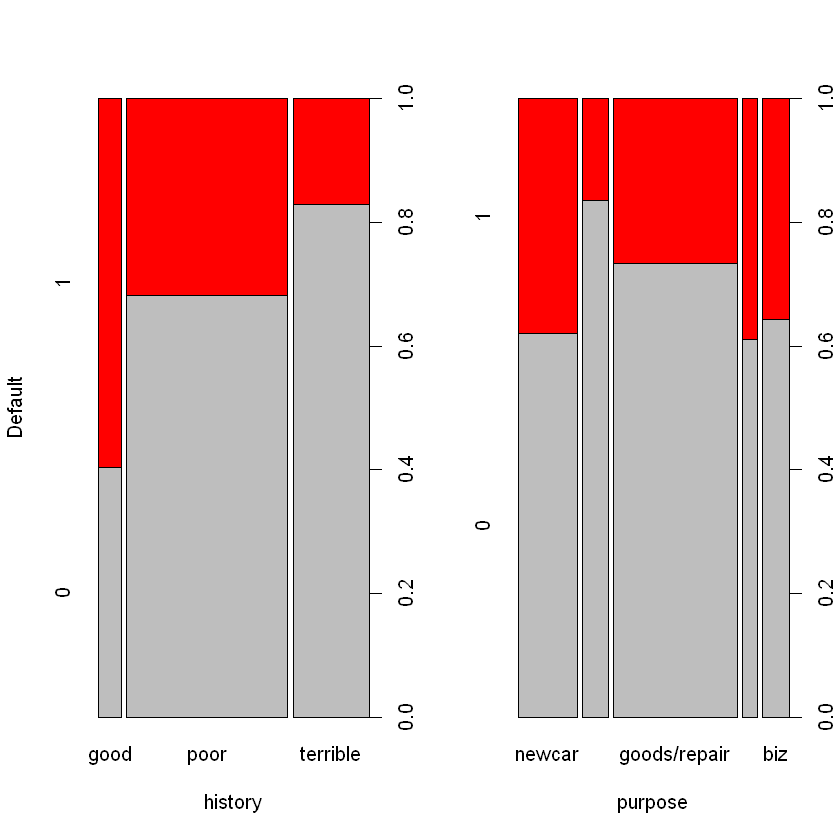

In [10]:
## plot a couple of dimensions
par(mfrow=c(1,2))

plot(factor(Default) ~ history, data=credit, col=c(8,2), ylab="Default") ## surprise!
plot(factor(Default) ~ purpose, data=credit, col=c(8,2), ylab="") 

This looks counterintuitive -- borrowers with great prior credit history default more frequently! What could be the story here? Or is it due to mistakes in recording the data?

#### 4. Choose a reasonable step-size $\alpha$. Plot the value of the objective function on each iteration of gradient descent, with the iteration number on the horizontal axis and the objective value	on the vertical axis. 

Make sure to include axis labels and a title for your plot. Draw the plot described above for three cases: too small $\alpha$, reasonable $\alpha$, and too big $\alpha$.  You should be able to see the objective function decreases quickly and then becomes stable if the scale of $\alpha$ is reasonable.

In [11]:
# INPUT your code here




#### 5. Use the  reasonable $\alpha$ you get and run the gradient descent on the German credit data. Report the number of iterations that are required for the algorithm to converge. Report the estimated regression coefficients. Also, implement logistic regression using R package `glm`. Does your programmed procedure agree with the canned routine?

In [13]:
# First some data cleaning and prep
credit <- naref(credit)

In [14]:
# INPUT your code here
## logistic regression with your program




In [22]:
# INPUT your code here
## logistic regression with glm




# Here is one regression specification that I wrote
# Sparse design matrix for efficient computation
library(gamlr)
credx <- sparse.model.matrix( ~ duration + amount +
    installment + age + history +
    purpose + foreign + rent, data=credit)

default <- credit$Default
credscore <- glm.fit(credx, default, family = binomial())

#### 6. There are lots of regressors in the data set, making it hard to interpret the fitted model. We use LASSO penalty to do variable selection. Write down the objective function for the log-likelihood with a $L_1$ penalty, $\lambda$ being the penalty parameter as usual. 

In [24]:
# INPUT your answer here




#### 7. Use `glmnet` or `gamlr` to estimate the LASSO logistic regression. Report the selected $\lambda$ using cross validation. How many variables are selected by LASSO under CV, AICc, BIC, and AIC criteria?

In [28]:
# INPUT your code here


# LASSO logistic regression
credscore <- cv.gamlr(credx, default, family="binomial")
sum(coef(credscore)!=0) # number of variables selected

[1] 14

#### 8. In your optimal model chosen by cross validation, which variables in $X_i$ are relevant predictors of credit default? Are they all stastistically significant? Choose one significant predictor and interpret the coefficient.

In [18]:
# INPUT your answer here




In classification problems, the metrics to evaluate predictive accuracy are various: **confusion matrix, accuracy/error/misclassification rate, specificity and sensitivity, and ROC/AUC**. 

A confusion matrix summarizes all four different scenarios of an actual-predicted pair:

|          | Predicted 1     | Predicted 0   |
|---------:|:----------------|:--------------|
| **Actual 1** | True Positive   | False Negative| 
| **Actual 0** | False Positive  | True Negative | 

There are two ways to be wrong in a binary problem.
- false positive (FP): predict $\hat{Y_i} = 1$ when $Y_i=0$
- false negative (FN): predict $\hat{Y_i} = 0$ when $Y_i=1$

Logistic regression gives us an estimate of $Pr(Y=1|X=x, \beta)$. Under Bayes decision rule, classify as 1 (defauter) if the predicted probability $\hat{p} > 0.5$. However, sometimes making the optimal decision (e.g., granting a loan or not) requires taking into account the cost and benefit of an action. Under certain cost configuration, a profit maximizing bank should lend whenever the probability of default is less than 0.2 (so that the expected profit from lending exceeds that of not lending).

For any given cutoff $p$, we can define the following two metrics:
- sensitivity: proportion of true $Y=1$ classified as such
- specificity: proportion of true $Y=0$ classified as such

One index that captures predictive accuracy is *accuracy rate*, which is the sum of TP and TN divided by sample size. Error rate or misclassification rate is $1 - accuracy$. Another commonly used evaluation tool is the ROC curve. It avoids the drawbacks of accuracy rate when classes are highly imbalanced. See the figure below for an example ROC curve. It traces the change in sensitivity and specificity as the cutoff value $p$ goes from 0 to 1. One predictive model is better than the other if the ROC curve lies above it everywhere. Intuitively, for two models that achieve the same level of specificity, the one that yields a higher sensitivity is better.

In [34]:
## prediction from our fitted logistic regression model
pred <- predict(credscore, credx, type="response")

pred <- drop(pred) # remove the sparse Matrix formatting

data.frame(default,pred)[1:10,]

default,pred
0,0.1262547
1,0.4622522
0,0.1550758
0,0.4094682
1,0.3792323
0,0.4171023
0,0.2849803
0,0.3340328
0,0.2095200
1,0.3404866


In [ ]:
## misclassification rates
rule <- 1/5 # move this around to see how these change

sum( (pred>rule)[default==0] )/sum(pred>rule) ## false positive rate
sum( (pred<rule)[default==1] )/sum(pred<rule) ## false negative rate

In [32]:
## ROC curve
## function to plot the ROC curve for classification of y with p
roc <- function(p,y, ...){
  y <- factor(y)
  n <- length(p)
  p <- as.vector(p)
  Q <- p > matrix(rep(seq(0,1,length=100),n),ncol=100,byrow=TRUE)
  specificity <- colMeans(!Q[y==levels(y)[1],])
  sensitivity <- colMeans(Q[y==levels(y)[2],])
  plot(1-specificity, sensitivity, type="l", ...)
  abline(a=0,b=1,lty=2,col=8) # what we will get by classifying randomly
}

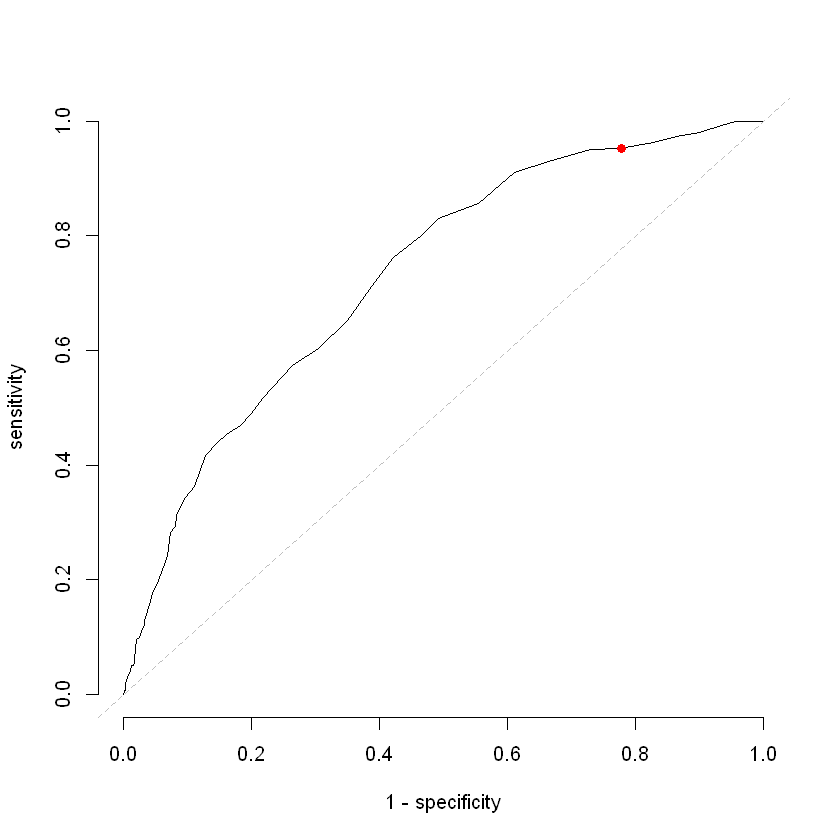

In [31]:
roc(p=pred, y=default, bty="n")

## our 1/5 rule cutoff 
rule <- 1/5 # move this around to see how things change
sensitivity<- sum( (pred>rule)[default==1] )/sum(default==1) ## sensitivity
specificity<-sum( (pred<rule)[default==0] )/sum(default==0) ## specificity

points(x= 1-specificity, 
	y=sensitivity, 
	cex=1.5, pch=20, col='red') 
## a standard `max prob' (p=.5) rule

#### 9. Now, experiment with a few other algorithms -- random forest and neural network -- to predict credit default. Examine the confusion matrix and accuracy rates. Report the test error (i.e., misclassification rate) for all models, including logistic regression and regularized logistic regression, in a summary table. Plot the ROC curve for all models on one single graph. Which algorithm wins in predicting default?

You need to split your sample into train (80%) and test (20%) for this exercise.

In [ ]:
# INPUT your code here

# build model and make prediction



In [ ]:
# INPUT your code here

# create summary table



In [ ]:
# INPUT your code here

# create ROC figure



In [35]:
# INPUT your answer here



### Congrats, you are done!

Before you quit the document, here is one thing to ponder. Do loan officers actually make their decision based on these prediction algorithms? If not, how do they fare compared to the algorithms we trained using retrospective data?

These turn out to be a difficult and deep questions (let alone the ethical and philosophical issues), but also extremely worthwhile to think about in the age of automation. A few economists teamed up with computer scientists and provided us with some interesting food for thought: [Human Decisions and Machine Predictions in the context of criminal justice](https://doi.org/10.1093/qje/qjx032)

Reference: Jon Kleinberg, Himabindu Lakkaraju, Jure Leskovec, Jens Ludwig, Sendhil Mullainathan, *Human Decisions and Machine Predictions*, The Quarterly Journal of Economics, Volume 133, Issue 1, February 2018, Pages 237–293